# Image comparison

Juan Berrios | juanberrios@pitt.edu | Last updated: August 20, 2023

**Summary and overview of the data:**

- In this purpose we continue the work of processing images so their degree of similarity can be used as a measure of task success. I will process the maps completed by participants and then calculate similarity measures between them and the intended map.

# 1. Preparations

In [1]:
#Importing libraries

import glob #for directory-level operations
import pandas as pd #for data frames
import numpy as np #for arrays
import cv2 #for images
from skimage.metrics import structural_similarity as ssim #Similarity measure
import re #regular expressions

#Releasing all output:     

from IPython.core.interactiveshell import InteractiveShell #Prints all commands rather than the last one.
InteractiveShell.ast_node_interactivity = "all"

#Turning pretty print off:
%pprint

Pretty printing has been turned OFF


## 2. Image similarity measures

In [29]:
def image_compare(fdir):
    """Takes a directory as input. It then takes it files that matches a participant pattern (excluding routes)
    and compares it to the route. The output is the similarity measure"""
    for fname in glob.glob(fdir + "random_2_out.png"): 
        drawing = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2GRAY)
        target = cv2.cvtColor(cv2.imread(fdir + "route_out.png"), cv2.COLOR_BGR2GRAY)
        print(fname,"ssim: ", ssim(drawing, target))
        
#    for fname in glob.glob(fdir + "[A-Z][0-9]_out.png"): 
#    for fname in glob.glob(fdir + "random_2_out.png"): 

In [26]:
#Original

image_compare("data/images/maps/drawings/A_1_I/") 
image_compare("data/images/maps/drawings/A_1_II/")
image_compare("data/images/maps/drawings/A_2_I/")
image_compare("data/images/maps/drawings/A_2_II/")
image_compare("data/images/maps/drawings/B_1_I/")
image_compare("data/images/maps/drawings/B_1_II/")
image_compare("data/images/maps/drawings/B_2_I/")
image_compare("data/images/maps/drawings/B_2_II/")

data/images/maps/drawings/A_1_I\A2_out.png ssim:  0.9386070575272003
data/images/maps/drawings/A_1_I\F1_out.png ssim:  0.946822627267159
data/images/maps/drawings/A_1_I\J1_out.png ssim:  0.9498248656328971
data/images/maps/drawings/A_1_I\J2_out.png ssim:  0.9522730685068789
data/images/maps/drawings/A_1_I\L2_out.png ssim:  0.9480707494936195
data/images/maps/drawings/A_1_I\M2_out.png ssim:  0.9346346583941006
data/images/maps/drawings/A_1_I\N1_out.png ssim:  0.9177684159633213
data/images/maps/drawings/A_1_I\Q2_out.png ssim:  0.9286124369665867
data/images/maps/drawings/A_1_I\R1_out.png ssim:  0.948927788048522
data/images/maps/drawings/A_1_I\U1_out.png ssim:  0.9351810446923159
data/images/maps/drawings/A_1_II\A1_out.png ssim:  0.9460752867054738
data/images/maps/drawings/A_1_II\A2_out.png ssim:  0.9424978040144167
data/images/maps/drawings/A_1_II\F1_out.png ssim:  0.9450763236055783
data/images/maps/drawings/A_1_II\J1_out.png ssim:  0.9478213313729105
data/images/maps/drawings/A_1_II

In [28]:
#Random 1

image_compare("data/images/maps/drawings/A_1_I/") 
image_compare("data/images/maps/drawings/A_1_II/")
image_compare("data/images/maps/drawings/A_2_I/")
image_compare("data/images/maps/drawings/A_2_II/")
image_compare("data/images/maps/drawings/B_1_I/")
image_compare("data/images/maps/drawings/B_1_II/")
image_compare("data/images/maps/drawings/B_2_I/")
image_compare("data/images/maps/drawings/B_2_II/")

data/images/maps/drawings/A_1_I/random_1_out.png ssim:  0.9119219726316968
data/images/maps/drawings/A_1_II/random_1_out.png ssim:  0.9002689359651909
data/images/maps/drawings/A_2_I/random_1_out.png ssim:  0.9269082274243808
data/images/maps/drawings/A_2_II/random_1_out.png ssim:  0.8964075995485702
data/images/maps/drawings/B_1_I/random_1_out.png ssim:  0.9213772861104912
data/images/maps/drawings/B_1_II/random_1_out.png ssim:  0.8968089712848192
data/images/maps/drawings/B_2_I/random_1_out.png ssim:  0.9144896699901199
data/images/maps/drawings/B_2_II/random_1_out.png ssim:  0.8975382689419606


In [30]:
#Random 2

image_compare("data/images/maps/drawings/A_1_I/") 
image_compare("data/images/maps/drawings/A_1_II/")
image_compare("data/images/maps/drawings/A_2_I/")
image_compare("data/images/maps/drawings/A_2_II/")
image_compare("data/images/maps/drawings/B_1_I/")
image_compare("data/images/maps/drawings/B_1_II/")
image_compare("data/images/maps/drawings/B_2_I/")
image_compare("data/images/maps/drawings/B_2_II/")

data/images/maps/drawings/A_1_I/random_2_out.png ssim:  0.8719422149067411
data/images/maps/drawings/A_1_II/random_2_out.png ssim:  0.8590504690171057
data/images/maps/drawings/A_2_I/random_2_out.png ssim:  0.8849010312782953
data/images/maps/drawings/A_2_II/random_2_out.png ssim:  0.8657454360605379
data/images/maps/drawings/B_1_I/random_2_out.png ssim:  0.8568727208474602
data/images/maps/drawings/B_1_II/random_2_out.png ssim:  0.8574033016691773
data/images/maps/drawings/B_2_I/random_2_out.png ssim:  0.8478834739097453
data/images/maps/drawings/B_2_II/random_2_out.png ssim:  0.8352039476099405


In [31]:
#Random target

def image_compare_random(fdir, fdir_random):
    """Takes a directory as input. It then takes it files that matches a a participant pattern (excluding routes)
    and compares it to the route. The output is the similarity measure"""
    for fname in glob.glob(fdir + "[A-Z][0-9]_out.png"): 
        drawing = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2GRAY)
        target = cv2.cvtColor(cv2.imread(fdir_random + "route_out.png"), cv2.COLOR_BGR2GRAY)
        print(fname,"ssim: ", ssim(drawing, target))

In [32]:
#Random target

image_compare_random("data/images/maps/drawings/A_1_I/","data/images/maps/drawings/A_1_II/") 
image_compare_random("data/images/maps/drawings/A_1_II/","data/images/maps/drawings/A_1_I/")
image_compare_random("data/images/maps/drawings/A_2_I/","data/images/maps/drawings/A_2_II/")
image_compare_random("data/images/maps/drawings/A_2_II/","data/images/maps/drawings/A_2_I/")
image_compare_random("data/images/maps/drawings/B_1_I/","data/images/maps/drawings/B_1_II/")
image_compare_random("data/images/maps/drawings/B_1_II/","data/images/maps/drawings/B_1_I/")
image_compare_random("data/images/maps/drawings/B_2_I/","data/images/maps/drawings/B_2_II/")
image_compare_random("data/images/maps/drawings/B_2_II/","data/images/maps/drawings/B_2_I/")

data/images/maps/drawings/A_1_I\A2_out.png ssim:  0.9368341787343766
data/images/maps/drawings/A_1_I\F1_out.png ssim:  0.9389048068658687
data/images/maps/drawings/A_1_I\J1_out.png ssim:  0.9436276336907327
data/images/maps/drawings/A_1_I\J2_out.png ssim:  0.9482178304064143
data/images/maps/drawings/A_1_I\L2_out.png ssim:  0.9396049592852277
data/images/maps/drawings/A_1_I\M2_out.png ssim:  0.9314369184420864
data/images/maps/drawings/A_1_I\N1_out.png ssim:  0.911333633504914
data/images/maps/drawings/A_1_I\Q2_out.png ssim:  0.9231205416312457
data/images/maps/drawings/A_1_I\R1_out.png ssim:  0.9439262484133635
data/images/maps/drawings/A_1_I\U1_out.png ssim:  0.931683882672812
data/images/maps/drawings/A_1_II\A1_out.png ssim:  0.9399161199920824
data/images/maps/drawings/A_1_II\A2_out.png ssim:  0.9362627075001009
data/images/maps/drawings/A_1_II\F1_out.png ssim:  0.9398287601271599
data/images/maps/drawings/A_1_II\J1_out.png ssim:  0.9417039484020465
data/images/maps/drawings/A_1_II

- The information above was saved into a spreadsheet. Look up later how to do this directly through the notebook.

In [2]:
#Loading data

df = pd.read_csv("spreadsheets/df_similarity.csv")

In [3]:
#Previewing

df.shape
df #It looks ok

(80, 1)

,Item
0,data/images/maps/drawings/A_1_I\A2_out.png ssi...
1,data/images/maps/drawings/A_1_I\F1_out.png ssi...
2,data/images/maps/drawings/A_1_I\J1_out.png ssi...
3,data/images/maps/drawings/A_1_I\J2_out.png ssi...
4,data/images/maps/drawings/A_1_I\L2_out.png ssi...
...,...
75,data/images/maps/drawings/B_2_II\O2_out.png ss...
76,data/images/maps/drawings/B_2_II\P1_out.png ss...
77,data/images/maps/drawings/B_2_II\T1_out.png ss...
78,data/images/maps/drawings/B_2_II\W1_out.png ss...


In [4]:
#Extracting relevant information using regular expressions. We can get all of this from the filename.

df['File']= df['Item'].str.extract(r"([^\s]+)") #Item (entire item)
df['Similarity']= df['Item'].str.extract(r":(.*)") #Similarity index
df['Map']= df['Item'].str.extract(r"drawings/([A-Z].*)\\") #Map
df['Participant']= df['Item'].str.extract(r"\\([A-Z][1-2])") #Participant

In [5]:
df['Similarity'] = df['Similarity'].apply(pd.to_numeric, errors='coerce') #Turning similarity to a numeric variable

In [6]:
#Previewing

df

,Item,File,Similarity,Map,Participant
0,data/images/maps/drawings/A_1_I\A2_out.png ssi...,data/images/maps/drawings/A_1_I\A2_out.png,0.938607,A_1_I,A2
1,data/images/maps/drawings/A_1_I\F1_out.png ssi...,data/images/maps/drawings/A_1_I\F1_out.png,0.946823,A_1_I,F1
2,data/images/maps/drawings/A_1_I\J1_out.png ssi...,data/images/maps/drawings/A_1_I\J1_out.png,0.949825,A_1_I,J1
3,data/images/maps/drawings/A_1_I\J2_out.png ssi...,data/images/maps/drawings/A_1_I\J2_out.png,0.952273,A_1_I,J2
4,data/images/maps/drawings/A_1_I\L2_out.png ssi...,data/images/maps/drawings/A_1_I\L2_out.png,0.948071,A_1_I,L2
...,...,...,...,...,...
75,data/images/maps/drawings/B_2_II\O2_out.png ss...,data/images/maps/drawings/B_2_II\O2_out.png,0.944480,B_2_II,O2
76,data/images/maps/drawings/B_2_II\P1_out.png ss...,data/images/maps/drawings/B_2_II\P1_out.png,0.945496,B_2_II,P1
77,data/images/maps/drawings/B_2_II\T1_out.png ss...,data/images/maps/drawings/B_2_II\T1_out.png,0.945062,B_2_II,T1
78,data/images/maps/drawings/B_2_II\W1_out.png ss...,data/images/maps/drawings/B_2_II\W1_out.png,0.936982,B_2_II,W1


- We'll now add information about the session by building a dictionary based on participants and the session they took part it. This will also allow us to add a language column:

In [7]:
df['Participant'].unique()

array(['A2', 'F1', 'J1', 'J2', 'L2', 'M2', 'N1', 'Q2', 'R1', 'U1', 'A1',
       'B1', 'B2', 'I1', 'I2', 'K2', 'M1', 'N2', 'Q1', 'R2', 'V1', 'E1',
       'E2', 'G1', 'G2', 'K1', 'O1', 'P2', 'S1', 'X1', 'Z1', 'F2', 'H1',
       'H2', 'L1', 'O2', 'P1', 'T1', 'W1', 'Y1'], dtype=object)

In [8]:
#Session dictionary

session_dict = {'A2': 'Fourteen', 'F1': 'Three', 'J1': 'Five', 'J2': 'Eighteen', 'L2': 'Nineteen', 'M2': 'Twenty', 
           'N1': 'Seven', 'Q2': 'Twenty-two',  'R1': 'Nine', 'U1': 'Eleven', 'A1': 'One', 'B1': 'One', 
                'B2': 'Fourteen', 'I1': 'Five', 'I2': 'Eighteen', 'K2': 'Nineteen', 'M1': 'Seven', 'N2': 'Twenty', 
                'Q1': 'Nine', 'R2': 'Twenty-two', 'V1': 'Eleven', 'E1': 'Three', 'E2': 'Sixteen', 'G1': 'Four', 
                'G2': 'Seventeen', 'K1': 'Six', 'O1': 'Eigth', 'P2': 'Twenty-one',  'S1': 'Ten', 'X1': 'Twelve', 
                'Z1': 'Thirteen', 'F2': 'Sixteen', 'H1': 'Four', 'H2': 'Seventeen', 'L1': 'Six', 'O2': 'Twenty-one', 
                'P1': 'Eigth', 'T1': 'Ten', 'W1': 'Twelve', 'Y1': 'Thirteen'}

In [9]:
#Language dictionary 

lang_dict = {'One': 'English', 'Three': 'English', 'Four' : 'English', 'Five': 'English', 
             'Six': 'English', 'Seven' : 'Spanish', 'Eigth': 'Spanish', 'Nine' : 'Spanish', 'Ten': 'English', 
             'Eleven': 'English', 'Twelve' : 'English', 'Thirteen': 'English', 'Fourteen' : 'English',
             'Sixteen': 'Spanish', 'Seventeen': 'Spanish', 'Eighteen': 'Spanish', 
             'Nineteen': 'Spanish','Twenty': 'English','Twenty-one': 'Spanish','Twenty-two': 'Spanish'}

In [10]:
#Mapping dictionary values

df['Session'] = df['Participant'].map(session_dict)
df['Language'] = df['Session'].map(lang_dict)

In [11]:
#Previewing 
df.sample(10)

,Item,File,Similarity,Map,Participant,Session,Language
75,data/images/maps/drawings/B_2_II\O2_out.png ss...,data/images/maps/drawings/B_2_II\O2_out.png,0.944480,B_2_II,O2,Twenty-one,Spanish
1,data/images/maps/drawings/A_1_I\F1_out.png ssi...,data/images/maps/drawings/A_1_I\F1_out.png,0.946823,A_1_I,F1,Three,English
41,data/images/maps/drawings/B_1_I\E2_out.png ssi...,data/images/maps/drawings/B_1_I\E2_out.png,0.952747,B_1_I,E2,Sixteen,Spanish
51,data/images/maps/drawings/B_1_II\E2_out.png ss...,data/images/maps/drawings/B_1_II\E2_out.png,0.935208,B_1_II,E2,Sixteen,Spanish
43,data/images/maps/drawings/B_1_I\G2_out.png ssi...,data/images/maps/drawings/B_1_I\G2_out.png,0.961278,B_1_I,G2,Seventeen,Spanish
77,data/images/maps/drawings/B_2_II\T1_out.png ss...,data/images/maps/drawings/B_2_II\T1_out.png,0.945062,B_2_II,T1,Ten,English
57,data/images/maps/drawings/B_1_II\S1_out.png ss...,data/images/maps/drawings/B_1_II\S1_out.png,0.945076,B_1_II,S1,Ten,English
13,data/images/maps/drawings/A_1_II\J1_out.png ss...,data/images/maps/drawings/A_1_II\J1_out.png,0.947821,A_1_II,J1,Five,English
33,data/images/maps/drawings/A_2_II\I2_out.png ss...,data/images/maps/drawings/A_2_II\I2_out.png,0.959382,A_2_II,I2,Eighteen,Spanish
10,data/images/maps/drawings/A_1_II\A1_out.png ss...,data/images/maps/drawings/A_1_II\A1_out.png,0.946075,A_1_II,A1,One,English


In [12]:
#Removing item that's no longer useful
df = df.drop(['Item'], axis=1)

In [13]:
df.sample(10)

,File,Similarity,Map,Participant,Session,Language
60,data/images/maps/drawings/B_2_I\A1_out.png,0.962218,B_2_I,A1,One,English
7,data/images/maps/drawings/A_1_I\Q2_out.png,0.928612,A_1_I,Q2,Twenty-two,Spanish
4,data/images/maps/drawings/A_1_I\L2_out.png,0.948071,A_1_I,L2,Nineteen,Spanish
18,data/images/maps/drawings/A_1_II\Q2_out.png,0.917068,A_1_II,Q2,Twenty-two,Spanish
77,data/images/maps/drawings/B_2_II\T1_out.png,0.945062,B_2_II,T1,Ten,English
39,data/images/maps/drawings/A_2_II\V1_out.png,0.957476,A_2_II,V1,Eleven,English
73,data/images/maps/drawings/B_2_II\H2_out.png,0.937988,B_2_II,H2,Seventeen,Spanish
55,data/images/maps/drawings/B_1_II\O1_out.png,0.942353,B_1_II,O1,Eigth,Spanish
61,data/images/maps/drawings/B_2_I\F2_out.png,0.960397,B_2_I,F2,Sixteen,Spanish
78,data/images/maps/drawings/B_2_II\W1_out.png,0.936982,B_2_II,W1,Twelve,English


In [14]:
df.shape

(80, 6)

In [15]:
#Session three has duplicates
#df.loc[df['Session'] == 'Three']

In [16]:
#Removing duplicates based on indexes
#df = df.drop(index=[33,72])

In [17]:
#Resetting index
#df = df.reset_index()

In [18]:
#Previewing again
#df.shape
#df

In [68]:
#Language numbers

df.groupby('Language').describe()

Similarity                                                    \
              count      mean       std       min       25%       50%   
Language                                                                
English        44.0  0.949338  0.011372  0.913662  0.942407  0.948823   
Spanish        36.0  0.945907  0.013204  0.915688  0.942162  0.946752   

                              
               75%       max  
Language                      
English   0.959793  0.965554  
Spanish   0.957958  0.964016

In [69]:
#Session numbers
df.groupby('Session').describe()

Similarity                                                    \
                count      mean       std       min       25%       50%   
Session                                                                   
Eighteen          4.0  0.956237  0.005982  0.950266  0.951771  0.955827   
Eigth             4.0  0.952449  0.010233  0.942353  0.944710  0.951713   
Eleven            4.0  0.947531  0.012926  0.935181  0.937012  0.947549   
Five              4.0  0.954035  0.006089  0.947821  0.949324  0.954272   
Four              4.0  0.943370  0.020665  0.913662  0.937657  0.949897   
Fourteen          4.0  0.948160  0.009885  0.938607  0.941525  0.946534   
Nine              4.0  0.946534  0.001636  0.945407  0.945524  0.945900   
Nineteen          4.0  0.948451  0.007316  0.941589  0.944502  0.946772   
One               4.0  0.949198  0.010166  0.937855  0.944020  0.948359   
Seven             4.0  0.933933  0.016269  0.917768  0.921019  0.934684   
Seventeen         4.0  0.949370  0.010054  0.937988  0.943340  0.949108   
Six               4.0  0.950122  0.011220  0.941218  0.941906  0.946961   
Sixteen           4.0  0.947978  0.010948  0.935208  0.941472  0.948153   
Ten               4.0  0.954327  0.010811  0.945062  0.945073  0.953347   
Thirteen          4.0  0.952984  0.011294  0.941245  0.944534  0.953054   
Three             4.0  0.943391  0.013210  0.925088  0.940079  0.945949   
Twelve            4.0  0.950556  0.011685  0.936982  0.943052  0.951265   
Twenty            4.0  0.949046  0.012489  0.934635  0.941083  0.949542   
Twenty-one        4.0  0.937300  0.018447  0.915688  0.926727  0.937444   
Twenty-two        4.0  0.940910  0.021404  0.917068  0.925726  0.943327   

                                
                 75%       max  
Session                         
Eighteen    0.960293  0.963027  
Eigth       0.959452  0.964016  
Eleven      0.958069  0.959845  
Five        0.958984  0.959776  
Four        0.955610  0.960023  
Fourteen    0.953169  0.960966  
Nine        0.946910  0.948928  
Nineteen    0.950721  0.958671  
One         0.953536  0.962218  
Seven       0.947598  0.948597  
Seventeen   0.955139  0.961278  
Six         0.955176  0.965348  
Sixteen     0.954659  0.960397  
Ten         0.962602  0.965554  
Thirteen    0.961504  0.964585  
Three       0.949261  0.956577  
Twelve      0.958769  0.962712  
Twenty      0.957505  0.962468  
Twenty-one  0.948016  0.958625  
Twenty-two  0.958511  0.959916

In [70]:
df.groupby(['Language']).mean()
df.groupby(['Language']).median()
df.groupby(['Language']).std()
df.groupby(['Language']).min()
df.groupby(['Language']).max()

,Similarity
Language,
English,0.949338
Spanish,0.945907


,Similarity
Language,
English,0.948823
Spanish,0.946752


,Similarity
Language,
English,0.011372
Spanish,0.013204


,File,Similarity,Map,Participant,Session
Language,,,,,
English,data/images/maps/drawings/A_1_II\A1_out.png,0.913662,A_1_I,A1,Eleven
Spanish,data/images/maps/drawings/A_1_II\J2_out.png,0.915688,A_1_I,E2,Eighteen


,File,Similarity,Map,Participant,Session
Language,,,,,
English,data/images/maps/drawings/B_2_I\Y1_out.png,0.965554,B_2_II,Z1,Twenty
Spanish,data/images/maps/drawings/B_2_I\P1_out.png,0.964016,B_2_II,R2,Twenty-two


In [71]:
pd.DataFrame(df.groupby(['Session','Language']).mean().Similarity)

,,Similarity
Session,Language,
Eighteen,Spanish,0.956237
Eigth,Spanish,0.952449
Eleven,English,0.947531
Five,English,0.954035
Four,English,0.943370
Fourteen,English,0.948160
Nine,Spanish,0.946534
Nineteen,Spanish,0.948451
One,English,0.949198


In [72]:
pd.DataFrame(df.groupby(['Session','Language']).std().Similarity)

,,Similarity
Session,Language,
Eighteen,Spanish,0.005982
Eigth,Spanish,0.010233
Eleven,English,0.012926
Five,English,0.006089
Four,English,0.020665
Fourteen,English,0.009885
Nine,Spanish,0.001636
Nineteen,Spanish,0.007316
One,English,0.010166


In [73]:
pd.DataFrame(df.groupby(['Session','Language']).max().Similarity)

,,Similarity
Session,Language,
Eighteen,Spanish,0.963027
Eigth,Spanish,0.964016
Eleven,English,0.959845
Five,English,0.959776
Four,English,0.960023
Fourteen,English,0.960966
Nine,Spanish,0.948928
Nineteen,Spanish,0.958671
One,English,0.962218


In [74]:
pd.DataFrame(df.groupby(['Session','Language']).min().Similarity)

,,Similarity
Session,Language,
Eighteen,Spanish,0.950266
Eigth,Spanish,0.942353
Eleven,English,0.935181
Five,English,0.947821
Four,English,0.913662
Fourteen,English,0.938607
Nine,Spanish,0.945407
Nineteen,Spanish,0.941589
One,English,0.937855


### Z-scoring

In [79]:
from scipy.stats import zscore

In [114]:
from sklearn.preprocessing import normalize

In [88]:
df['Similarity_Z'] = zscore(df['Similarity'])

In [89]:
df

,File,Similarity,Map,Participant,Session,Language,Similarity_Z
0,data/images/maps/drawings/A_1_I\A2_out.png,0.938607,A_1_I,A2,Fourteen,English,-0.753374
1,data/images/maps/drawings/A_1_I\F1_out.png,0.946823,A_1_I,F1,Three,English,-0.079671
2,data/images/maps/drawings/A_1_I\J1_out.png,0.949825,A_1_I,J1,Five,English,0.166523
3,data/images/maps/drawings/A_1_I\J2_out.png,0.952273,A_1_I,J2,Eighteen,Spanish,0.367283
4,data/images/maps/drawings/A_1_I\L2_out.png,0.948071,A_1_I,L2,Nineteen,Spanish,0.022680
...,...,...,...,...,...,...,...
75,data/images/maps/drawings/B_2_II\O2_out.png,0.944480,B_2_II,O2,Twenty-one,Spanish,-0.271751
76,data/images/maps/drawings/B_2_II\P1_out.png,0.945496,B_2_II,P1,Eigth,Spanish,-0.188455
77,data/images/maps/drawings/B_2_II\T1_out.png,0.945062,B_2_II,T1,Ten,English,-0.224035
78,data/images/maps/drawings/B_2_II\W1_out.png,0.936982,B_2_II,W1,Twelve,English,-0.886624


In [91]:
pd.DataFrame(df.groupby(['Session','Language']).mean().Similarity_Z)

,,Similarity_Z
Session,Language,
Eighteen,Spanish,0.692327
Eigth,Spanish,0.381709
Eleven,English,-0.021562
Five,English,0.511803
Four,English,-0.362821
Fourteen,English,0.030010
Nine,Spanish,-0.103345
Nineteen,Spanish,0.053868
One,English,0.115088


In [95]:
np.mean(df['Similarity'])

0.9477941805245328

In [105]:
np.mean(df['Similarity_Z'])

-9.63812363252714e-16

In [106]:
np.around((np.mean(df['Similarity'])), decimals=2, out=None)

0.95

In [107]:
np.around((np.mean(df['Similarity_Z'])), decimals=2, out=None)

-0.0

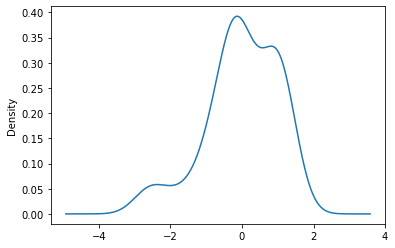

In [113]:
ax = df['Similarity_Z'].plot.kde()

In [118]:
normalize(df['Similarity'])

ValueError: Expected 2D array, got 1D array instead:
array=[0.93860706 0.94682263 0.94982487 0.95227307 0.94807075 0.93463466
 0.91776842 0.92861244 0.94892779 0.93518104 0.94607529 0.9424978
 0.94507632 0.94782133 0.95026591 0.9415887  0.94323209 0.92210294
 0.91706806 0.94623765 0.93762216 0.95064198 0.95056944 0.95871961
 0.96302654 0.95867126 0.94726544 0.96246762 0.94556302 0.95991648
 0.95984544 0.96096628 0.95977595 0.95938192 0.94547361 0.94859718
 0.95585104 0.94540722 0.95804202 0.95747631 0.95657739 0.95274669
 0.95413833 0.96127776 0.9517854  0.95793052 0.93040689 0.96161751
 0.95745495 0.9604771  0.92508774 0.93520804 0.94565517 0.94512363
 0.94121845 0.94235306 0.91568824 0.94507604 0.94507493 0.9412447
 0.96221838 0.96039682 0.96002338 0.95309257 0.96534841 0.95862457
 0.96401631 0.96555425 0.96271171 0.9645853  0.9378549  0.94355966
 0.91366197 0.93798801 0.94213581 0.94448028 0.94549604 0.94506215
 0.93698212 0.94562995].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.